In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv('/Users/vladamalkina/Downloads/train 2.csv')
data_songs = pd.read_csv('/Users/vladamalkina/Downloads/songs.csv')
data_songs_extra = pd.read_csv('/Users/vladamalkina/Downloads/song_extra_info.csv')
data_members = pd.read_csv('/Users/vladamalkina/Downloads/members.csv')

In [3]:
data_test = pd.read_csv('/Users/vladamalkina/Downloads/test 2.csv')
data_sample_submission = pd.read_csv('/Users/vladamalkina/Downloads/sample_submission.csv')

# train dataset

In [4]:
display(data_train.head())

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


### Проверим наличие дубликатов:

In [6]:
data_train.duplicated().sum()

0

### Посчитаем пропуски в столбцах:

In [7]:
data_train.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [8]:
import numpy as np
for col in data_train.columns:
    pct_missing = round(data_train[col].isna().sum()/data_train.shape[0]*100, 2)
    print('{} - {}%'.format(col, pct_missing))

msno - 0.0%
song_id - 0.0%
source_system_tab - 0.34%
source_screen_name - 5.62%
source_type - 0.29%
target - 0.0%


### Незначительное количество пропусков присутствует в столбцах source_system_tab, source_screen_name, source_type.

### удалим записи с пропусками

In [9]:
data_train = data_train.dropna()

In [10]:
data_train.shape

(6959297, 6)

### Функция для вывода уникальных значений столбцов:

In [11]:
def uniq(data):
    for column in data.columns:
        print(column, data[column].unique())
        print()
uniq(data_train)

msno ['FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg='
 'Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8='
 'uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=' ...
 '1Y/5t7/lVxT6scW1U4FtrafFnHe5HLr0793S4cNrXyM='
 'pSXUjXoK/eKqB0much1HvcBsOUTxPiCaC8WYUT/9fxg='
 'oHMpaCQRI6fzq/jamfTvv5tFfukkE9/VERi7/CfQ9M0=']

song_id ['BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik='
 'bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM='
 'JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=' ...
 'SZZUaT+kWlIDkjgJqK5VJls94gArFT1BgkrFLjvJVIc='
 '7+DNPp8HiFDXlQmNejGezfdJ15eXGms1PmRCwtc+zVQ='
 'WJzitiYM7ddyalCdx8/Gkkt1UFSp2t/0ZY74CrMGvWg=']

source_system_tab ['explore' 'my library' 'search' 'discover' 'radio' 'listen with'
 'notification' 'settings']

source_screen_name ['Explore' 'Local playlist more' 'My library' 'Online playlist more'
 'Album more' 'Discover Feature' 'Unknown' 'Discover Chart' 'Radio'
 'Artist more' 'Search' 'Others profile more' 'Search Trends'
 'Discover Genre' 'My library_Search' 'Search Home' 'Discover New'
 

# songs dataset

In [12]:
display(data_songs.head())

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [13]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


### Проверим наличие дубликатов:

In [14]:
data_songs.duplicated().sum()

0

### Приведем данные к нужному типу:

In [15]:
data_songs['language'] = data_songs['language'].astype(str)

In [16]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   song_id      object
 1   song_length  int64 
 2   genre_ids    object
 3   artist_name  object
 4   composer     object
 5   lyricist     object
 6   language     object
dtypes: int64(1), object(6)
memory usage: 122.6+ MB


### Посчитаем пропуски в столбцах:

In [17]:
data_songs.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             0
dtype: int64

In [18]:
for col in data_songs.columns:
    pct_missing = round(data_songs[col].isna().sum()/data_songs.shape[0]*100, 2)
    print('{} - {}%'.format(col, pct_missing))

song_id - 0.0%
song_length - 0.0%
genre_ids - 4.1%
artist_name - 0.0%
composer - 46.66%
lyricist - 84.71%
language - 0.0%


### обнаружено большое количество пропусков в столбцах composer и lyricist, также небольшое количество пропусков присутствует в столбце genre_ids

### удалим пропуски в столбце genre_ids и language

In [19]:
data_songs = data_songs[data_songs['genre_ids'].notna()]
data_songs = data_songs[data_songs['language'].notna()]

In [20]:
len(data_songs["composer"].unique())

323979

In [21]:
len(data_songs['lyricist'].unique())

108439

### Построим ящик с усами для численных признаков

### songs_length in ms переведем songs_length в минуты

In [22]:
data_songs['song_length'] = data_songs['song_length']//60000

In [23]:
data_songs['song_length'].describe()

count    2.202204e+06
mean     3.622487e+00
std      2.703243e+00
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.020000e+02
Name: song_length, dtype: float64

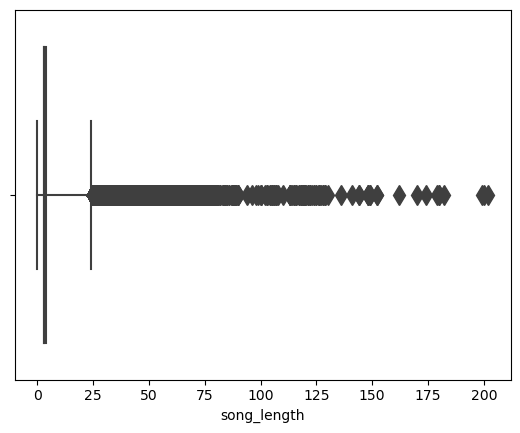

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data_songs['song_length'], fliersize = 10, whis = 20)
plt.show()

### Обнаружены выбросы и аномальные значения в столбце song_length, удалим их

In [25]:
Q1 = data_songs['song_length'].quantile(0.25)
Q3 = data_songs['song_length'].quantile(0.75)
IQR = Q3 - Q1
data_songs = data_songs.loc[(data_songs['song_length'] >= Q1-1.5*IQR ) & (data_songs['song_length'] <= Q3+1.5*IQR)]

In [26]:
data_songs['song_length'].describe()

count    1.841392e+06
mean     3.294196e+00
std      9.028800e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: song_length, dtype: float64

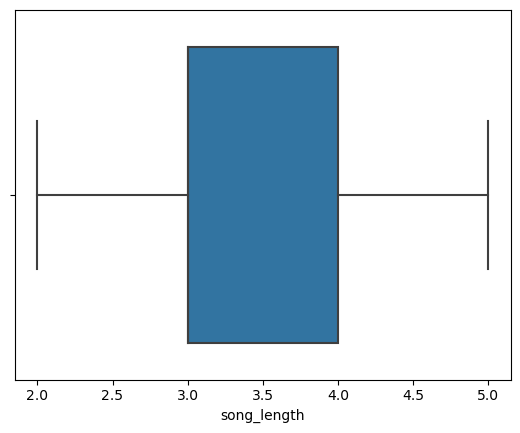

In [27]:
sns.boxplot(x=data_songs['song_length'], fliersize = 10, whis = 20)
plt.show()

In [28]:
data_songs.isna().sum()

song_id              0
song_length          0
genre_ids            0
artist_name          0
composer        842692
lyricist       1533756
language             0
dtype: int64

### выведем уникальные значения столбцов

In [29]:
uniq(data_songs)

song_id ['CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E='
 'o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU='
 'DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=' ...
 'nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU='
 'UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc='
 'V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=']

song_length [4 3 2 5]

genre_ids ['465' '444' '726' ... '1259|2107' '1138|2022' '1000|2154|751']

artist_name ['張信哲 (Jeff Chang)' 'BLACKPINK' 'SUPER JUNIOR' ... '鈴木理恵子/若林顕'
 'Avaleya and The GlitterHawks' 'Renato pezzella| Renato Pezzella']

composer ['董貞' 'TEDDY|  FUTURE BOUNCE|  Bekuh BOOM' nan ...
 'I. Lindo| M. Elliott| B Hammond'
 'Adam Lyons| Nathan Lyons| Timothy Voeten| Patrick Huerto| Thomas Davies| James Haigh'
 'Rodney Clawson| Vicky McGehee| David Lee Murphy']

lyricist ['何啟弘' 'TEDDY' nan ... 'Dan Wilson| C. Wilson| S. Kalanich' 'Stepz|Branco'
 'Rodney Clawson| Vicky McGehee| David Lee Murphy']

language ['3.0' '31.0' '52.0' '17.0' '10.0' '-1.0' '24.0' '59.0' '45.0' '38.0'
 'na

# songs_extra dataset

In [30]:
display(data_songs_extra.head())

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [31]:
data_songs_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


### Проверим наличие дубликатов:

In [32]:
data_songs_extra.duplicated().sum()

0

### Посчитаем пропуски в столбцах:

In [33]:
data_songs_extra.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

### удалим пропуски в столбце name

In [34]:
data_songs_extra = data_songs_extra[data_songs_extra['name'].notna()]

In [35]:
data_songs_extra.isna().sum()

song_id         0
name            0
isrc       136547
dtype: int64

In [36]:
for col in data_songs_extra.columns:
    pct_missing = round(data_songs_extra[col].isna().sum()/data_songs_extra.shape[0]*100, 2)
    print('{} - {}%'.format(col, pct_missing))

song_id - 0.0%
name - 0.0%
isrc - 5.95%


### Незначительное количество пропусков присутствует в столбце isrc.

### удалим записи с пропусками

In [37]:
data_songs_extra = data_songs_extra.dropna()

In [38]:
data_songs_extra.shape

(2159422, 3)

# data_members dataset

In [39]:
display(data_members.head())

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [40]:
data_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


### Приведем данные к нужному типу:

In [41]:
data_members['registered_via'] = data_members['registered_via'].astype(str)

In [42]:
data_members['city'] = data_members['city'].astype(str)

### registration_init_time, expiration_date to datetime

In [43]:
data_members['registration_init_time'] = pd.to_datetime(data_members['registration_init_time'],format='%Y%m%d', errors = 'coerce')
data_members['expiration_date'] = pd.to_datetime(data_members['expiration_date'],format='%Y%m%d', errors = 'coerce')

In [44]:
data_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  object        
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  object        
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.8+ MB


### Проверим наличие дубликатов:

In [45]:
data_members.duplicated().sum()

0

### Посчитаем пропуски в столбцах:

In [46]:
data_members.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [47]:
for col in data_members.columns:
    pct_missing = round(data_members[col].isna().sum()/data_members.shape[0]*100, 2)
    print('{} - {}%'.format(col, pct_missing))

msno - 0.0%
city - 0.0%
bd - 0.0%
gender - 57.85%
registered_via - 0.0%
registration_init_time - 0.0%
expiration_date - 0.0%


male      7405
female    7096
Name: gender, dtype: int64


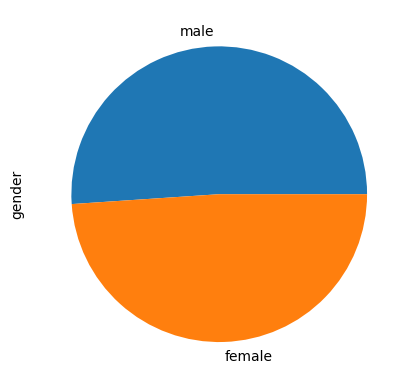

In [48]:
data_members["gender"].value_counts().plot.pie()
print(data_members["gender"].value_counts())

### Построим ящик с усами для численных признаков

In [49]:
data_members['bd'].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

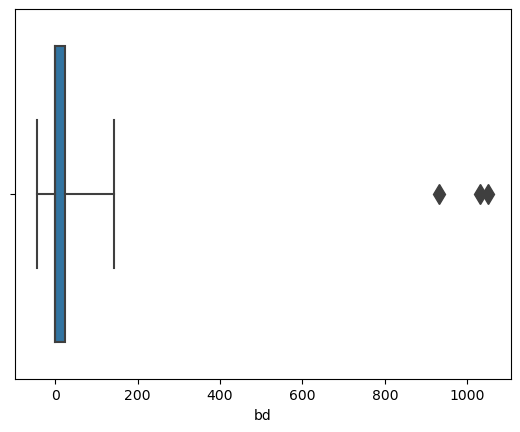

In [50]:
sns.boxplot(x=data_members['bd'], fliersize = 10, whis = 20)
plt.show()

### В столбце bd (age) присутствуют выбросы, удалим выбросы

In [51]:
Q1 = data_members['bd'].quantile(0.25)
Q3 = data_members['bd'].quantile(0.75)
IQR = Q3 - Q1
data_members = data_members.loc[(data_members['bd'] >= Q1-1.5*IQR ) & (data_members['bd'] <= Q3+1.5*IQR)]

In [52]:
data_members['bd'].describe()

count    34311.000000
mean        12.027484
std         15.241990
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max         62.000000
Name: bd, dtype: float64

In [53]:
data_members['bd'].unique()

array([ 0, 43, 28, 33, 20, 30, 29, 26, 25, 21, 22, 16, 23, 37, 18, 19, 51,
       24, 17, 45, 36, 57, 27, 34, 32, 15, 48, 50, 54, 47, 35, 46, 31, 14,
       41, 59,  2, 40, 38, 55, 39, 49, 44, 52, 42, 56, 58, 53,  3, 62, 61,
       60, 13, 12, 11,  7,  5, 10])

### удалим участников с возрастом < 11

In [54]:
data_members = data_members[data_members['bd'] > 11]

In [55]:
data_members.isna().sum()

msno                        0
city                        0
bd                          0
gender                    417
registered_via              0
registration_init_time      0
expiration_date             0
dtype: int64

# объединение датасетов

### 1) объединим датасеты data_train и data_members

In [56]:
train_members = data_train.merge(data_members, on = 'msno', how='left')

### 2) объединим датасеты train_members и data_songs

In [57]:
train_members_song = train_members.merge(data_songs, on = 'song_id', how='left')

### 3) объединим датасеты train_members_song и data_songs_extra

In [58]:
final_data = train_members_song.merge(data_songs_extra, on = 'song_id', how='left')

### Таким образом, мы объединили 4 датасета. Основным датасетом является train, остальные датасеты предоставляют нам дополнительную информацию. При объединении использовали left merge, чтобы сохранить все строчки из нашего основного датасета train.

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6959297 entries, 0 to 6959296
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   city                    object        
 7   bd                      float64       
 8   gender                  object        
 9   registered_via          object        
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                object        
 18  na

In [60]:
final_data.isna().sum()

msno                            0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                      2778491
bd                        2778491
gender                    2918388
registered_via            2778491
registration_init_time    2778491
expiration_date           2778491
song_length                320203
genre_ids                  320203
artist_name                320203
composer                  1784453
lyricist                  3128999
language                   320203
name                       531198
isrc                       531198
dtype: int64

In [61]:
for col in final_data.columns:
    pct_missing = round(final_data[col].isna().sum()/final_data.shape[0]*100, 2)
    print('{} - {}%'.format(col, pct_missing))

msno - 0.0%
song_id - 0.0%
source_system_tab - 0.0%
source_screen_name - 0.0%
source_type - 0.0%
target - 0.0%
city - 39.92%
bd - 39.92%
gender - 41.94%
registered_via - 39.92%
registration_init_time - 39.92%
expiration_date - 39.92%
song_length - 4.6%
genre_ids - 4.6%
artist_name - 4.6%
composer - 25.64%
lyricist - 44.96%
language - 4.6%
name - 7.63%
isrc - 7.63%


In [62]:
final_data.shape

(6959297, 20)

### заполним пропущенные значения

In [63]:
category = final_data.select_dtypes(include='O').columns
numeric = final_data.select_dtypes(include=(np.number)).columns
for col in category:
    final_data[col] = final_data[col].fillna('UnKnown')
for col in numeric:
    final_data[col] = final_data[col].interpolate(method='linear')

In [64]:
final_data.isna().sum()

msno                            0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                            0
bd                              1
gender                          0
registered_via                  0
registration_init_time    2778491
expiration_date           2778491
song_length                     0
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
name                            0
isrc                            0
dtype: int64

### удалим записи с пропусками

In [65]:
final_data_new = final_data

In [66]:
final_data_new = final_data_new.dropna()

In [67]:
final_data_new.shape[0]/final_data.shape[0]

0.6007511965648255

In [68]:
final_data_new.shape

(4180806, 20)

In [69]:
final_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4180806 entries, 1 to 6959292
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   city                    object        
 7   bd                      float64       
 8   gender                  object        
 9   registered_via          object        
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                object        
 18  na

### Преобразуем категориальные признаки и datetime к category 

In [70]:
final_data_new_matr = final_data_new

In [71]:
final_data_new_matr['registration_init_time'] = final_data_new['registration_init_time'].astype('category')
final_data_new_matr['expiration_date'] = final_data_new['expiration_date'].astype('category') 

/var/folders/dx/w90wg9sd0kbb_vk86lg641180000gn/T/ipykernel_1260/2495331536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_new_matr['registration_init_time'] = final_data_new['registration_init_time'].astype('category')
/var/folders/dx/w90wg9sd0kbb_vk86lg641180000gn/T/ipykernel_1260/2495331536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_new_matr['expiration_date'] = final_data_new['expiration_date'].astype('category')


### Преобразуем численные признаки 

In [72]:
for col in final_data_new_matr.select_dtypes(include=['object']).columns:
    final_data_new_matr[col] = final_data_new_matr[col].astype('category')

for col in final_data_new_matr.select_dtypes(include=['category']).columns:
    final_data_new_matr[col] = final_data_new_matr[col].cat.codes

/var/folders/dx/w90wg9sd0kbb_vk86lg641180000gn/T/ipykernel_1260/1964642844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_new_matr[col] = final_data_new_matr[col].astype('category')
/var/folders/dx/w90wg9sd0kbb_vk86lg641180000gn/T/ipykernel_1260/1964642844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_new_matr[col] = final_data_new_matr[col].astype('category')
/var/folders/dx/w90wg9sd0kbb_vk86lg641180000gn/T/ipykernel_1260/1964642844.py:2: SettingWithCopyWarning: 
A value is

### проверим преобразования

In [73]:
final_data_new_matr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4180806 entries, 1 to 6959292
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    int16  
 1   song_id                 int32  
 2   source_system_tab       int8   
 3   source_screen_name      int8   
 4   source_type             int8   
 5   target                  int64  
 6   city                    int8   
 7   bd                      float64
 8   gender                  int8   
 9   registered_via          int8   
 10  registration_init_time  int16  
 11  expiration_date         int16  
 12  song_length             float64
 13  genre_ids               int16  
 14  artist_name             int16  
 15  composer                int32  
 16  lyricist                int16  
 17  language                int8   
 18  name                    int32  
 19  isrc                    int32  
dtypes: float64(2), int16(6), int32(4), int64(1), int8(7)
memory usage: 2

### построим матрицу корреляции

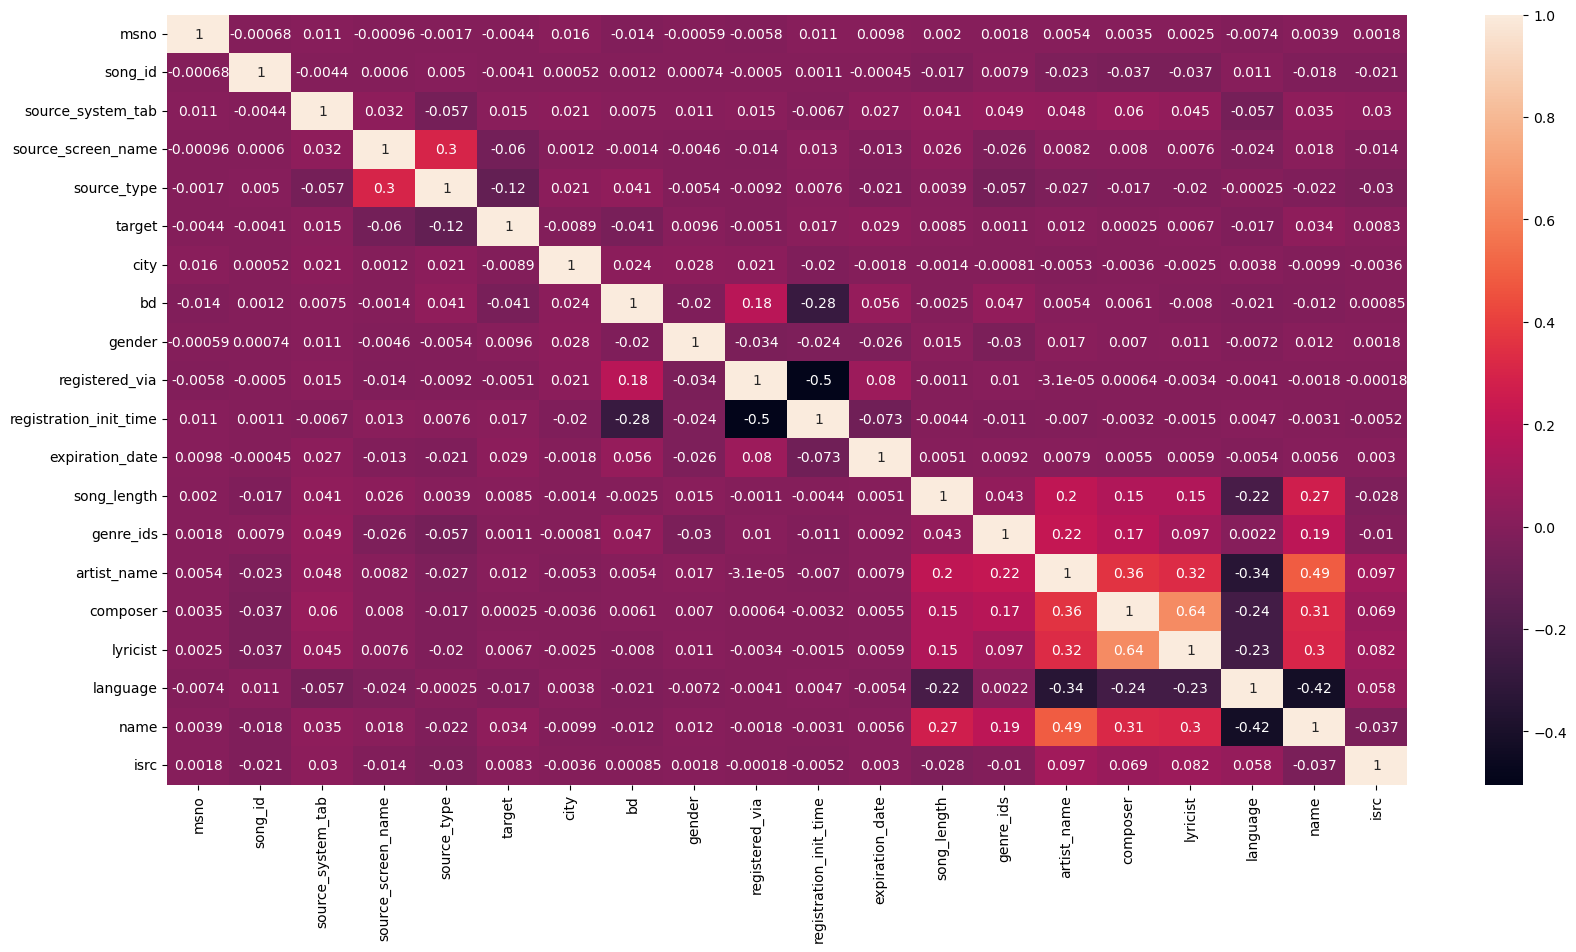

In [74]:
plt.figure(figsize=[20,10])
sns.heatmap(final_data_new_matr.corr(), annot=True)
plt.show()

# обучение моделей

In [125]:
X = final_data_new.drop(columns = ['target'])
y = final_data_new['target']

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = 12345)

In [127]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3135604, 19), (1045202, 19), (3135604,), (1045202,))

### Масштабирование численных признаков

In [128]:
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

X_train_num = X_train[numeric_features]
X_val_num = X_val[numeric_features]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

### Кодирование категориальных признаков

In [119]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 1) 

categorical_features = final_data_new.select_dtypes(include=['object']).columns.tolist()

X_train_cat = encoder.fit_transform(X_train[categorical_features]).astype(int)
X_val_cat = encoder.transform(X_val[categorical_features]).astype(int)

In [120]:
X_train = np.hstack((X_train_num_scaled, X_train_cat))
X_val = np.hstack((X_val_num_scaled, X_val_cat))
X_train.shape, X_val.shape

((3135604, 19), (1045202, 19))

### Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

In [82]:
from sklearn.metrics import f1_score
val_pred = logreg.predict(X_val)
logreg_val_f1 = f1_score(y_val,val_pred)
print("Test F1 : ",logreg_val_f1)

Test F1 :  0.620488061566796


<AxesSubplot:ylabel='Feature'>

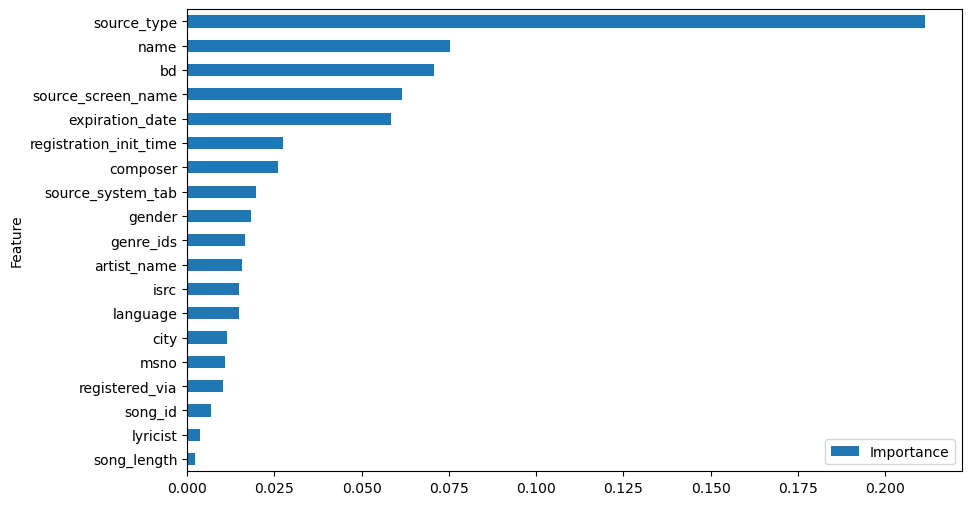

In [83]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

### top feature: source_type

## model with 1 feature

In [98]:
cols = ['source_type']
dat = X[cols]

In [99]:
X = dat
y = final_data_new['target']

In [100]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state = 12345)

In [101]:
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

X_train_num = X_train[numeric_features]
X_val_num = X_val[numeric_features]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 1) 

categorical_features = final_data_new.select_dtypes(include=['object']).columns.tolist()

X_train_cat = encoder.fit_transform(X_train[categorical_features]).astype(int)
X_val_cat = encoder.transform(X_val[categorical_features]).astype(int)

X_train = np.hstack((X_train_num_scaled, X_train_cat))
X_val = np.hstack((X_val_num_scaled, X_val_cat))

In [88]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

test_pred = logreg.predict(X_val)
logreg_test_f1 = f1_score(y_val,test_pred)
print("Test F1 : ",logreg_test_f1)

Test F1 :  0.6329936350039999


f1_score on 19 features: 0.62 

f1_score on 1 feature: 0.63

### Decision tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=5)
Dtree.fit(X_train,y_train)
train_pred = Dtree.predict(X_train)
val_pred = Dtree.predict(X_val)
Dtree_val_f1 = f1_score(y_val,val_pred)
print("Test f1 : ",Dtree_val_f1)

Test f1 :  0.6500348205229134


In [103]:
Dtree = DecisionTreeClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=5)
Dtree.fit(X_train,y_train)
val_pred = Dtree.predict(X_val)
Dtree_val_f1 = f1_score(y_val,val_pred)
print("Test Accuracy : ",Dtree_val_f1)

Test Accuracy :  0.6232919755840556


f1_score on 19 features: 0.65

f1_score on 1 feature: 0.62

###  Лучшая модель: DecisionTreeClassifier, обученная на 19 признаках

In [105]:
test_members = data_test.merge(data_members, on = 'msno', how='left')

In [106]:
test_members_song = test_members.merge(data_songs, on = 'song_id', how='left')

In [107]:
final_data = test_members_song.merge(data_songs_extra, on = 'song_id', how='left')

In [109]:
final_dat = final_data.merge(data_sample_submission, on = 'id', how='left')

In [112]:
final_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 21 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      int64         
 1   msno                    object        
 2   song_id                 object        
 3   source_system_tab       object        
 4   source_screen_name      object        
 5   source_type             object        
 6   city                    object        
 7   bd                      float64       
 8   gender                  object        
 9   registered_via          object        
 10  registration_init_time  datetime64[ns]
 11  expiration_date         datetime64[ns]
 12  song_length             float64       
 13  genre_ids               object        
 14  artist_name             object        
 15  composer                object        
 16  lyricist                object        
 17  language                object        
 18  na

## тестовая выборка:

In [114]:
X_test = final_dat.drop(columns = ['target'])
y_test = final_dat['target']

In [131]:
X_test = X_test.drop(columns = 'id')

In [142]:
numeric_features = X_test.select_dtypes(exclude=['object']).columns.tolist()

X_test_num = X_test[numeric_features]
X_test_num_scaled = scaler.transform(X_test_num)

categorical_features = final_data_new.select_dtypes(include=['object']).columns.tolist()

X_test_cat = encoder.transform(X_test[categorical_features]).astype(int)
X_test = np.hstack((X_test_num_scaled, X_test_cat))

In [143]:
pred_test = Dtree.predict(X_test)
print(f1_score(y_test, pred_test))

/Users/vladamalkina/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.6734702323201337


## f1_score на тестовой выборке 0.67